In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
df = pd.read_csv("~/Escritorio/Fish/Fish.csv")


In [57]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [58]:
species_list = df['Species'].unique().tolist()
species_list


['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

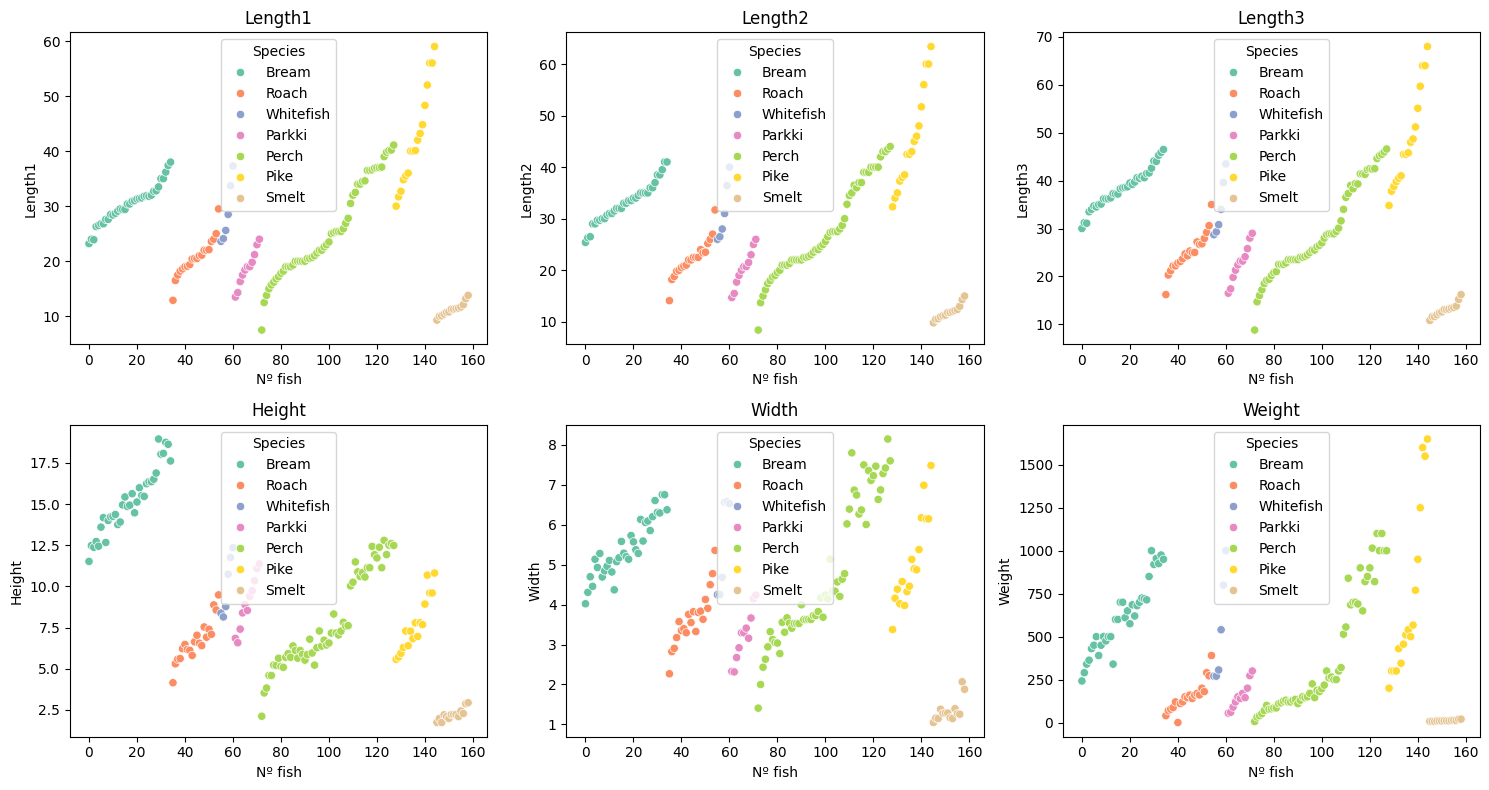

In [59]:
variables = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']

# Crear figura con subplots (2 filas x 3 columnas para 6 variables)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Un gráfico por variable
for i, var in enumerate(variables):
    sns.scatterplot(
        data=df,
        x=df.index,        
        y=var,             # variable en el eje Y
        hue='Species',     # color por especie
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(var)
    axes[i].set_xlabel("Nº fish")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

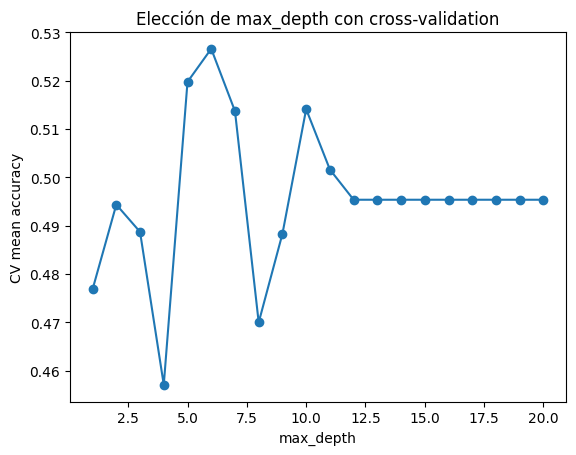

In [60]:
depths = range(1, 21)
mean_acc = []

for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(classifier, X, y, cv=5)  
    mean_acc.append(scores.mean())

plt.plot(depths, mean_acc, marker="o")
plt.xlabel("max_depth")
plt.ylabel("CV mean accuracy")
plt.title("Elección de max_depth con cross-validation")
plt.show()

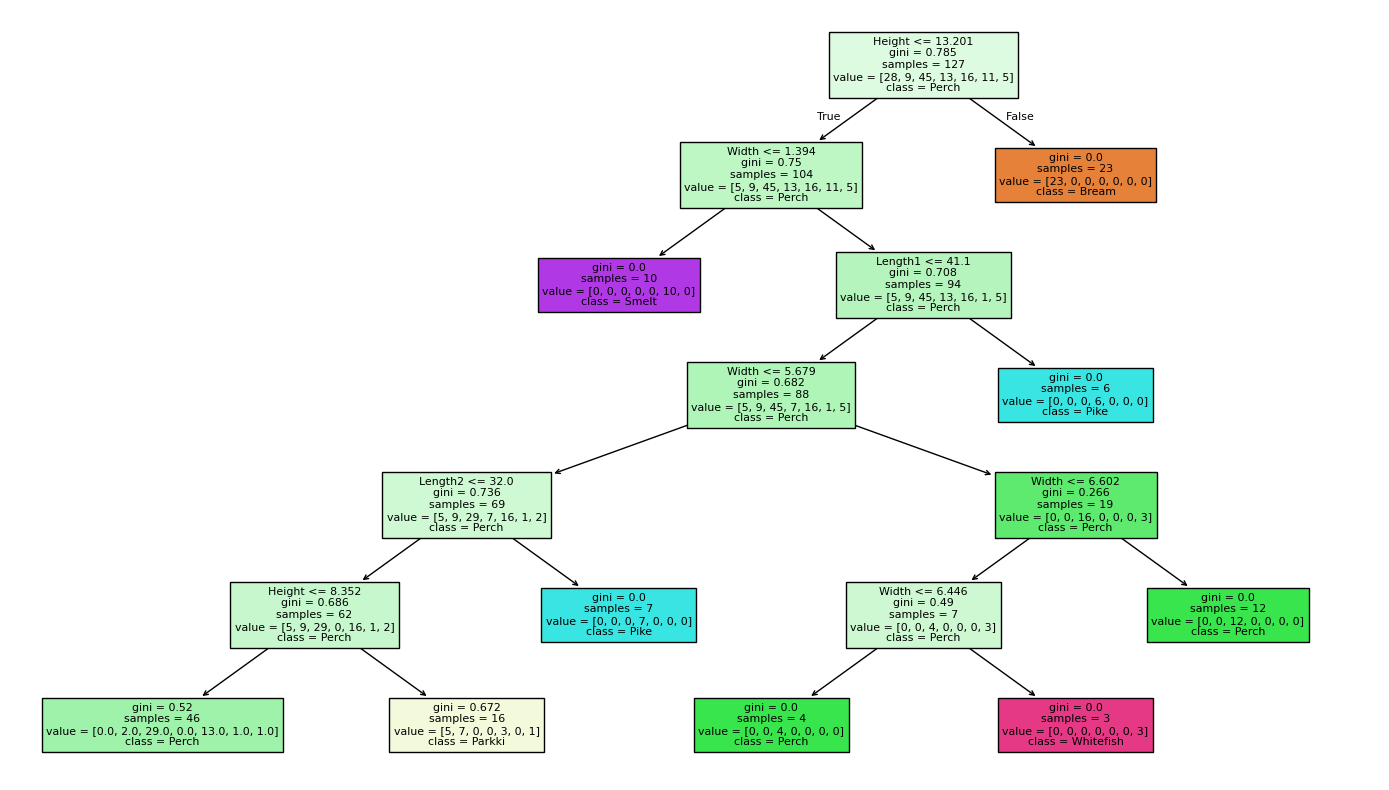

Accuracy del modelo para el test: 0.75
------------------------------------
              precision    recall  f1-score   support

       Bream       1.00      0.86      0.92         7
      Parkki       0.33      0.50      0.40         2
       Perch       0.65      1.00      0.79        11
        Pike       1.00      1.00      1.00         4
       Roach       0.00      0.00      0.00         4
       Smelt       1.00      0.67      0.80         3
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.75        32
   macro avg       0.57      0.57      0.56        32
weighted avg       0.68      0.75      0.70        32

------------------------------------
Confusion matrix:
 [[ 6  1  0  0  0  0  0]
 [ 0  1  1  0  0  0  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  1  0  0  2  0]
 [ 0  1  0  0  0  0  0]]
------------------------------------
CV mean accuracy (5-fold): 0.4953629032258064


/home/i-igob/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/i-igob/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/i-igob/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [61]:
#Cómo verificamos cómo de bueno es nuestro modelo? CROSS-VALIDATION
target = "Species"
feature_cols = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']

X = df[feature_cols] #X es cada variable que vamos a utilizar para crear el modelo
y = df[target] #y es la clase que queremos predecir, es decir df[target] = species

#Separamos el conjunto de datos en el training (80% del dataset) y el test (20%)
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Árbol (con límite de profundidad para evitar overfitting. Esto hay que comprobar el nivel de max_depth adecuado)
tree_classifier = DecisionTreeClassifier(max_depth=6, random_state=42) #Entrenamos el modelo 
tree_classifier.fit(X_training, y_training)

#Visualización del árbol
plt.figure(figsize=(14, 8))
plot_tree(tree_classifier, feature_names=feature_cols, class_names=sorted(y.unique()), filled=True)
plt.tight_layout(); plt.show()

#Usamos el test para comprobar rápidamente si el modelo es correcto, pero lo importante es el cross-validation que viene después.
y_pred = tree_classifier.predict(X_test) 
print("Accuracy del modelo para el test:", accuracy_score(y_test, y_pred))
print("------------------------------------")
print(classification_report(y_test, y_pred)) #Esto me da el reporte de cómo ha ido la clasificación 
print("------------------------------------")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("------------------------------------")
#Utilizamos un cross-validation de 5 capas
cv_acc = cross_val_score(clf, X, y, cv=5).mean()
print("CV mean accuracy (5-fold):", cv_acc)
